# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [5]:
import sys
!{sys.executable} -m pip install citipy

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import random
import datetime
from config import api_key 
from citipy import citipy
from scipy.stats import linregress

## Generate Cities List

In [7]:
cities = []

#use citipy to find nearest city for random latitudes and longitudes. Don't stop 'til you get enough.
while len(cities) < 600:
    lat = np.random.randint(-90,90)
    long = np.random.randint(-180,180) 
    city = citipy.nearest_city(lat,long)
    
    if city not in cities:
        cities.append(city)

print(len(cities))            

600


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
#Create empty lists for API call data collection and subsequent dataframe
found_cities = []
city_latitude = []
city_longitude =[]
city_max_temp = []
city_humidity = []
city_cloudiness = []
city_windspeed = []
city_country = []
date_of_call = []

base_url = "http://api.openweathermap.org/data/2.5/weather?"

print("Beginning Data Retrieval")
print("------------------------")
for i in range(len(cities)):
    search_city = cities[i].city_name.strip("()''")
    search_country = cities[i].country_code.strip("()''")
    url=str(base_url + "q=" + search_city + "," + search_country + "&units=metric&appid=" + api_key)
    try:
        json_response = requests.get(url).json()
        print(f"Processing Record {i} | City:" + str(json_response["name"]))
        found_cities.append(json_response["name"])
        city_latitude.append(json_response["coord"]["lat"])
        city_longitude.append(json_response["coord"]["lon"])
        city_max_temp.append(json_response["main"]["temp_max"])
        city_humidity.append(json_response["main"]["humidity"])
        city_cloudiness.append(json_response["clouds"]["all"])
        city_windspeed.append(json_response["wind"]["speed"])
        city_country.append(json_response["sys"]["country"])
        date_of_call.append(json_response["dt"])
    except KeyError:
        print("City Not Found. Skipping...")
    

Beginning Data Retrieval
------------------------
Processing Record 0 | City:Dengzhou
Processing Record 1 | City:Sitka
Processing Record 2 | City:Zapolyarnyy
City Not Found. Skipping...
Processing Record 4 | City:Georgetown
Processing Record 5 | City:Rikitea
City Not Found. Skipping...
Processing Record 7 | City:Yellowknife
Processing Record 8 | City:Charyshskoye
Processing Record 9 | City:Cabanbanan
City Not Found. Skipping...
Processing Record 11 | City:Atuona
Processing Record 12 | City:Petropavlovsk-Kamchatskiy
Processing Record 13 | City:Qaanaaq
Processing Record 14 | City:Dikson
Processing Record 15 | City:Saskylakh
Processing Record 16 | City:Punta Arenas
Processing Record 17 | City:Iqaluit
Processing Record 18 | City:Elko
Processing Record 19 | City:Jalu
Processing Record 20 | City:Arteaga
Processing Record 21 | City:Kapaa
Processing Record 22 | City:Mackay
Processing Record 23 | City:Saint Paul Harbor
Processing Record 24 | City:Verkhoyansk
Processing Record 25 | City:Pangkala

Processing Record 221 | City:Yayva
Processing Record 222 | City:Saint-Pierre
Processing Record 223 | City:Gamba
Processing Record 224 | City:Kemijärvi
Processing Record 225 | City:Aracaju
Processing Record 226 | City:Norman Wells
Processing Record 227 | City:Mirzāpur
City Not Found. Skipping...
Processing Record 229 | City:Kāmyārān
Processing Record 230 | City:Sarkand
Processing Record 231 | City:Valley City
Processing Record 232 | City:Mandalgovi
Processing Record 233 | City:Kamenka
Processing Record 234 | City:Oktyabr'skiy
Processing Record 235 | City:Kachīry
Processing Record 236 | City:San Andrés
City Not Found. Skipping...
Processing Record 238 | City:Saldanha
Processing Record 239 | City:Mar del Plata
Processing Record 240 | City:Jinchang
City Not Found. Skipping...
Processing Record 242 | City:Duminichi
Processing Record 243 | City:Youkounkoun
Processing Record 244 | City:Baruun-Urt
City Not Found. Skipping...
Processing Record 246 | City:Victoria
Processing Record 247 | City:Ti

Processing Record 439 | City:Suba
Processing Record 440 | City:Juneau
Processing Record 441 | City:Portland
Processing Record 442 | City:Houma
Processing Record 443 | City:Yaring
Processing Record 444 | City:Aklavik
Processing Record 445 | City:Sambava
Processing Record 446 | City:Ardahan
City Not Found. Skipping...
Processing Record 448 | City:Lompoc
City Not Found. Skipping...
Processing Record 450 | City:Mount Gambier
Processing Record 451 | City:Poso
Processing Record 452 | City:Gladstone
Processing Record 453 | City:Morant Bay
Processing Record 454 | City:Dunedin
Processing Record 455 | City:Mantua
Processing Record 456 | City:Tiznit Province
Processing Record 457 | City:Libreville
City Not Found. Skipping...
Processing Record 459 | City:Sabinas
Processing Record 460 | City:Pont-à-Mousson
City Not Found. Skipping...
Processing Record 462 | City:Pitimbu
Processing Record 463 | City:Jiménez
Processing Record 464 | City:Zabol
Processing Record 465 | City:Ayagoz
Processing Record 466 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [26]:
cities_df = pd.DataFrame({
    "City":found_cities,
    "Lat":city_latitude,
    "Long":city_longitude,
    "Max Temp (C)":city_max_temp,
    "Humidity":city_humidity,
    "Cloudiness":city_cloudiness,
    "Windspeed":city_windspeed,
    "Country Code":city_country,
    "Date":date_of_call 
})

#Convert date timestamp to easy-read date for charting and files
date_timestamp = cities_df.iloc[1,8]
date = datetime.datetime.fromtimestamp(date_timestamp).strftime('%Y-%m-%d')

cities_df.to_csv(f"city_data_{date}.csv",index=False)

cities_df

,City,Lat,Long,Max Temp (C),Humidity,Cloudiness,Windspeed,Country Code,Date
0,Dengzhou,37.81,120.75,18.93,74,100,3.52,CN,1601310100
1,Sitka,57.05,-135.33,12.00,76,90,3.60,US,1601310101
2,Zapolyarnyy,69.42,30.81,9.00,87,75,8.20,RU,1601310101
3,Georgetown,-7.93,-14.42,23.63,77,100,7.14,SH,1601310101
4,Rikitea,-23.12,-134.97,23.53,81,3,3.81,PF,1601310102
...,...,...,...,...,...,...,...,...,...
524,Brigantine,39.41,-74.36,23.00,78,1,4.60,US,1601310198
525,The Pas,53.83,-101.25,7.00,81,90,3.10,CA,1601310268
526,Puerto Baquerizo Moreno,-0.90,-89.60,21.00,88,75,6.20,EC,1601310269
527,Tahoua,14.89,5.27,36.00,30,64,2.10,NE,1601310269


In [10]:
cities_df.describe()

,Lat,Long,Max Temp (C),Humidity,Cloudiness,Windspeed,Date
count,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,5.290000e+02
mean,19.147996,15.722344,18.954669,69.400756,53.185255,3.790208,1.601310e+09
std,33.325539,90.294668,10.234832,21.576724,37.425225,2.385697,7.272507e+01
min,-54.800000,-179.170000,-10.150000,7.000000,0.000000,0.130000,1.601310e+09
25%,-8.350000,-66.850000,10.950000,60.000000,19.000000,2.000000,1.601310e+09
50%,22.080000,20.580000,21.000000,75.000000,64.000000,3.300000,1.601310e+09
75%,48.550000,96.170000,27.000000,86.000000,90.000000,5.100000,1.601310e+09
max,78.220000,178.420000,42.200000,100.000000,100.000000,13.440000,1.601310e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
humid_cities = cities_df.loc[cities_df["Humidity"]>100]
humid_cities

,City,Lat,Long,Max Temp (C),Humidity,Cloudiness,Windspeed,Country Code,Date


In [12]:
#  Get the indices of cities that have humidity over 100%.


In [13]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

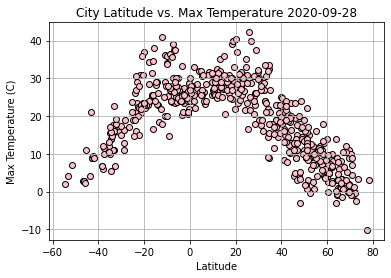

In [14]:
lat = cities_df.loc[:,"Lat"]
max_temp = cities_df.loc[:,"Max Temp (C)"]
plt.scatter(lat,max_temp,c="pink",edgecolors="black")
plt.title(f"City Latitude vs. Max Temperature {date}")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(axis="both")
plt.savefig("lat_v_temp.png")
plt.show()

## Latitude vs. Humidity Plot

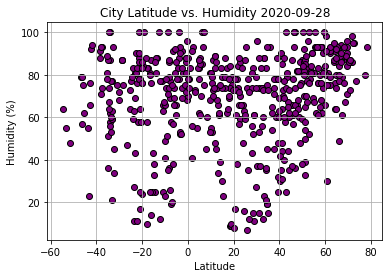

In [15]:
lat = cities_df.loc[:,"Lat"]
max_temp = cities_df.loc[:,"Humidity"]
plt.scatter(lat,max_temp,c="purple",edgecolors="black")
plt.title(f"City Latitude vs. Humidity {date}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(axis="both")
plt.savefig("lat_v_humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

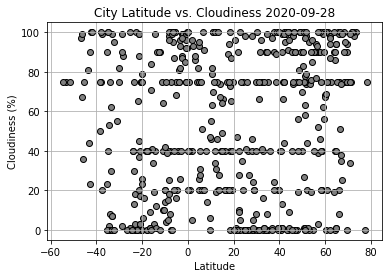

In [16]:
lat = cities_df.loc[:,"Lat"]
max_temp = cities_df.loc[:,"Cloudiness"]
plt.scatter(lat,max_temp,c="gray",edgecolors="black")
plt.title(f"City Latitude vs. Cloudiness {date}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(axis="both")
plt.savefig("lat_v_cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

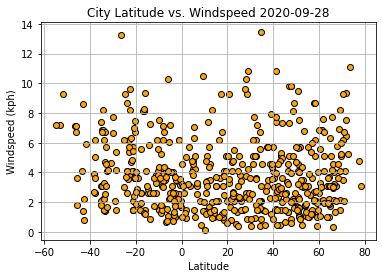

In [17]:
lat = cities_df.loc[:,"Lat"]
max_temp = cities_df.loc[:,"Windspeed"]
plt.scatter(lat,max_temp,c="orange",edgecolors="black")
plt.title(f"City Latitude vs. Windspeed {date}")
plt.xlabel("Latitude")
plt.ylabel("Windspeed (kph)")
plt.grid(axis="both")
plt.savefig("lat_v_windspeed.png")
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is -0.8531762772081352


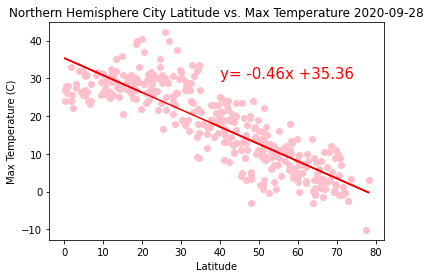

In [18]:
lat = cities_df.loc[cities_df["Lat"]>0,"Lat"]
max_temp = cities_df.loc[cities_df["Lat"]>0,"Max Temp (C)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(lat,max_temp)
northern_temp_regress_values = slope*lat + intercept
northern_temp_regress_eq = "y= " + str(round(slope,2)) + "x +" + str(round(intercept,2))
                
print(f"The r-value is {rvalue}")
plt.scatter(lat,max_temp,c="pink",)
plt.title(f"Northern Hemisphere City Latitude vs. Max Temperature {date}")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.savefig("lat_v_temp_regression_northern.png")
plt.plot(lat,northern_temp_regress_values,"r-")
plt.annotate(northern_temp_regress_eq,(40,30),fontsize=15,color="red")
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is 0.7610935097215319


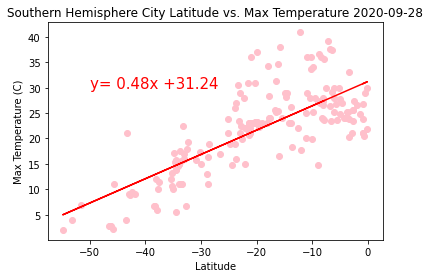

In [19]:
lat = cities_df.loc[cities_df["Lat"]<0,"Lat"]
max_temp = cities_df.loc[cities_df["Lat"]<0,"Max Temp (C)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(lat,max_temp)
southern_temp_regress_values = slope*lat + intercept
southern_temp_regress_eq = "y= " + str(round(slope,2)) + "x +" + str(round(intercept,2))
                
print(f"The r-value is {rvalue}")
plt.scatter(lat,max_temp,c="pink",)
plt.title(f"Southern Hemisphere City Latitude vs. Max Temperature {date}")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.savefig("lat_v_temp_regression_southern.png")
plt.plot(lat,southern_temp_regress_values,"r-")
plt.annotate(southern_temp_regress_eq,(-50,30),fontsize=15,color="red")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.2589499969216073


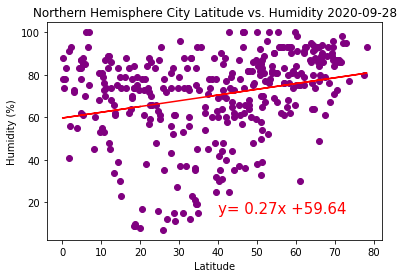

In [20]:
lat = cities_df.loc[cities_df["Lat"]>0,"Lat"]
humidity = cities_df.loc[cities_df["Lat"]>0,"Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(lat,humidity)
northern_humidity_regress_values = slope*lat + intercept
northern_humidity_regress_eq = "y= " + str(round(slope,2)) + "x +" + str(round(intercept,2))
                
print(f"The r-value is {rvalue}")
plt.scatter(lat,humidity,c="purple",)
plt.title(f"Northern Hemisphere City Latitude vs. Humidity {date}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("lat_v_humidity_regression_northern.png")
plt.plot(lat,northern_humidity_regress_values,"r-")
plt.annotate(northern_humidity_regress_eq,(40,15),fontsize=15,color="red")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.01477144873399793


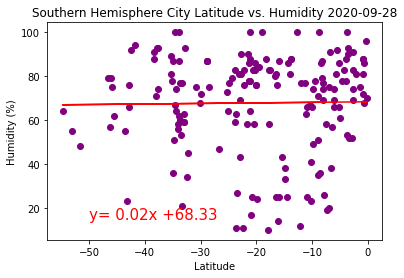

In [21]:
lat = cities_df.loc[cities_df["Lat"]<0,"Lat"]
humidity = cities_df.loc[cities_df["Lat"]<0,"Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(lat,humidity)
southern_humidity_regress_values = slope*lat + intercept
southern_humidity_regress_eq = "y= " + str(round(slope,2)) + "x +" + str(round(intercept,2))
                
print(f"The r-value is {rvalue}")
plt.scatter(lat,humidity,c="purple",)
plt.title(f"Southern Hemisphere City Latitude vs. Humidity {date}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("lat_v_humidity_regression_southern.png")
plt.plot(lat,southern_humidity_regress_values,"r-")
plt.annotate(southern_humidity_regress_eq,(-50,15),fontsize=15,color="red")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.20006928700051582


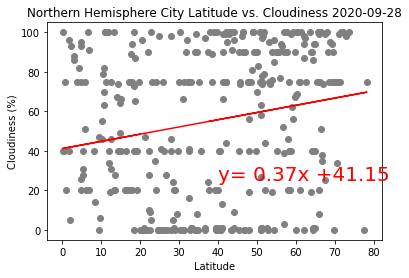

In [22]:
lat = cities_df.loc[cities_df["Lat"]>0,"Lat"]
cloudiness = cities_df.loc[cities_df["Lat"]>0,"Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(lat,cloudiness)
northern_cloudiness_regress_values = slope*lat + intercept
northern_cloudiness_regress_eq = "y= " + str(round(slope,2)) + "x +" + str(round(intercept,2))
                
print(f"The r-value is {rvalue}")
plt.scatter(lat,cloudiness,c="gray")
plt.title(f"Northern Hemisphere City Latitude vs. Cloudiness {date}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("lat_v_cloudiness_regression_northern.png")
plt.plot(lat,northern_cloudiness_regress_values,"r-")
plt.annotate(northern_cloudiness_regress_eq,(40,25),fontsize=20,color="red")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.08793137102988136


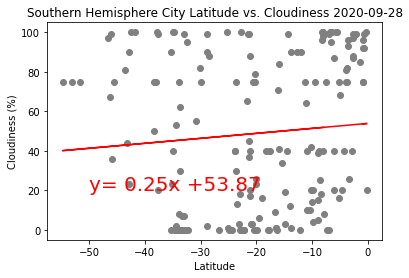

In [23]:
lat = cities_df.loc[cities_df["Lat"]<0,"Lat"]
cloudiness = cities_df.loc[cities_df["Lat"]<0,"Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(lat,cloudiness)
southern_cloudiness_regress_values = slope*lat + intercept
southern_cloudiness_regress_eq = "y= " + str(round(slope,2)) + "x +" + str(round(intercept,2))
                
print(f"The r-value is {rvalue}")
plt.scatter(lat,cloudiness,c="gray")
plt.title(f"Southern Hemisphere City Latitude vs. Cloudiness {date}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("lat_v_cloudiness_regression_southern.png")
plt.plot(lat,southern_cloudiness_regress_values,"r-")
plt.annotate(southern_cloudiness_regress_eq,(-50,20),fontsize=20,color="red")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is 0.10579795502806327


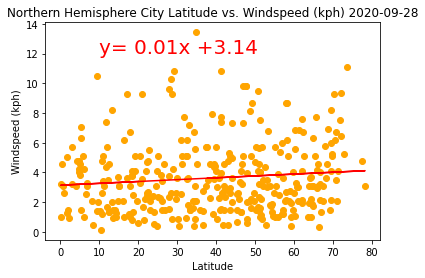

In [24]:
lat = cities_df.loc[cities_df["Lat"]>0,"Lat"]
windspeed = cities_df.loc[cities_df["Lat"]>0,"Windspeed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(lat,windspeed)
northern_windspeed_regress_values = slope*lat + intercept
northern_windspeed_regress_eq = "y= " + str(round(slope,2)) + "x +" + str(round(intercept,2))
                
print(f"The r-value is {rvalue}")
plt.scatter(lat,windspeed,c="orange")
plt.title(f"Northern Hemisphere City Latitude vs. Windspeed (kph) {date}")
plt.xlabel("Latitude")
plt.ylabel("Windspeed (kph)")
plt.savefig("lat_v_windspeed_regression_northern.png")
plt.plot(lat,northern_windspeed_regress_values,"r-")
plt.annotate(northern_windspeed_regress_eq,(10,12),fontsize=20,color="red")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is -0.25313191310946587


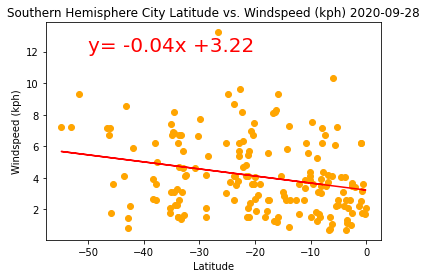

In [25]:
lat = cities_df.loc[cities_df["Lat"]<0,"Lat"]
windspeed = cities_df.loc[cities_df["Lat"]<0,"Windspeed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(lat,windspeed)
southern_windspeed_regress_values = slope*lat + intercept
southern_windspeed_regress_eq = "y= " + str(round(slope,2)) + "x +" + str(round(intercept,2))
                
print(f"The r-value is {rvalue}")
plt.scatter(lat,windspeed,c="orange")
plt.title(f"Southern Hemisphere City Latitude vs. Windspeed (kph) {date}")
plt.xlabel("Latitude")
plt.ylabel("Windspeed (kph)")
plt.savefig("lat_v_windspeed_regression_southern.png")
plt.plot(lat,southern_windspeed_regress_values,"r-")
plt.annotate(southern_windspeed_regress_eq,(-50,12),fontsize=20,color="red")
plt.show()